我的笔记本配置为：CPU：4800H 显卡：1650

该机器学习项目并不太要求显卡，但对CPU性能有较高要求

运行本项目需要事先在环境中配置一些库，并在代码单元格中先import这些库

data.csv是数据集，readme.txt是一些本人的说明，requirements.txt是在环境中运行该程序所需事先进行的一些配置

一、数据清洗

In [35]:
import pandas as pd
data=pd.read_csv("data.csv")##使用read_csv函数读取csv文件

random_seed=77##77是随机种子，如果随机种子相同，则每次运行代码都会生成完全相同的随机打乱顺序
data=data.sample(frac=1,random_state=random_seed)

data.head()##该函数加载了前几行，可以通过该函数看看数据有没有被正确读入

,Id,Home Ownership,Annual Income,Years in current job,Tax Liens,Number of Open Accounts,Years of Credit History,Maximum Open Credit,Number of Credit Problems,Months since last delinquent,Bankruptcies,Purpose,Term,Current Loan Amount,Current Credit Balance,Monthly Debt,Credit Score,Credit Default
2125,2125,Home Mortgage,901702.0,10+ years,0.0,8.0,26.5,417010.0,0.0,NaN,0.0,other,Short Term,110748.0,210691.0,8341.0,738.0,1
2214,2214,Home Mortgage,2321496.0,6 years,0.0,10.0,15.0,1360524.0,0.0,NaN,0.0,debt consolidation,Long Term,358402.0,460598.0,38498.0,744.0,0
6078,6078,Home Mortgage,919714.0,10+ years,0.0,10.0,10.7,184976.0,0.0,NaN,0.0,debt consolidation,Short Term,99999999.0,114551.0,14026.0,710.0,0
5757,5757,Home Mortgage,777100.0,10+ years,0.0,8.0,10.0,430958.0,1.0,4.0,1.0,debt consolidation,Short Term,269940.0,35359.0,16967.0,723.0,1
2253,2253,Home Mortgage,2424875.0,9 years,0.0,9.0,17.8,903276.0,0.0,11.0,0.0,debt consolidation,Long Term,292006.0,269135.0,25057.0,726.0,1


Id列是冗余数据，可以删除

In [36]:
data.shape##查看数据集的行数和列数，注意这里没有括号

(7500, 18)

In [37]:
data.info()##查看数据集的详细信息，注意这里有括号

<class 'pandas.core.frame.DataFrame'>
Index: 7500 entries, 2125 to 6871
Data columns (total 18 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Id                            7500 non-null   int64  
 1   Home Ownership                7500 non-null   object 
 2   Annual Income                 5943 non-null   float64
 3   Years in current job          7129 non-null   object 
 4   Tax Liens                     7500 non-null   float64
 5   Number of Open Accounts       7500 non-null   float64
 6   Years of Credit History       7500 non-null   float64
 7   Maximum Open Credit           7500 non-null   float64
 8   Number of Credit Problems     7500 non-null   float64
 9   Months since last delinquent  3419 non-null   float64
 10  Bankruptcies                  7486 non-null   float64
 11  Purpose                       7500 non-null   object 
 12  Term                          7500 non-null   object 
 13  Curre

In [38]:
data.describe()##查看数据集的分布情况，注意这里有括号，count表示计数，mean表示均值，std表示标准差

,Id,Annual Income,Tax Liens,Number of Open Accounts,Years of Credit History,Maximum Open Credit,Number of Credit Problems,Months since last delinquent,Bankruptcies,Current Loan Amount,Current Credit Balance,Monthly Debt,Credit Score,Credit Default
count,7500.000000,5.943000e+03,7500.000000,7500.000000,7500.000000,7.500000e+03,7500.000000,3419.000000,7486.000000,7.500000e+03,7.500000e+03,7500.000000,5943.000000,7500.000000
mean,3749.500000,1.366392e+06,0.030133,11.130933,18.317467,9.451537e+05,0.170000,34.692600,0.117152,1.187318e+07,2.898332e+05,18314.454133,1151.087498,0.281733
std,2165.207842,8.453392e+05,0.271604,4.908924,7.041946,1.602622e+07,0.498598,21.688806,0.347192,3.192612e+07,3.178714e+05,11926.764673,1604.451418,0.449874
min,0.000000,1.645970e+05,0.000000,2.000000,4.000000,0.000000e+00,0.000000,0.000000,0.000000,1.124200e+04,0.000000e+00,0.000000,585.000000,0.000000
25%,1874.750000,8.443410e+05,0.000000,8.000000,13.500000,2.792295e+05,0.000000,16.000000,0.000000,1.801690e+05,1.142565e+05,10067.500000,711.000000,0.000000
50%,3749.500000,1.168386e+06,0.000000,10.000000,17.000000,4.781590e+05,0.000000,32.000000,0.000000,3.095730e+05,2.093230e+05,16076.500000,731.000000,0.000000
75%,5624.250000,1.640137e+06,0.000000,14.000000,21.800000,7.935015e+05,0.000000,50.000000,0.000000,5.198820e+05,3.604062e+05,23818.000000,743.000000,1.000000
max,7499.000000,1.014934e+07,7.000000,43.000000,57.700000,1.304726e+09,7.000000,118.000000,4.000000,1.000000e+08,6.506797e+06,136679.000000,7510.000000,1.000000


In [39]:
from sklearn.preprocessing import StandardScaler,OneHotEncoder,LabelEncoder##引进特征标准化，独热编码和数值编码
from sklearn.model_selection import train_test_split##

##分离特征数据和标签数据
x=data.drop(["Credit Default"],axis=1)##特征数据读入x中
y=data["Credit Default"]##标签数据读入y

y##.ipynb与.py的区别是在.ipynb文件中的代码单元格中单打一个变量，就相当于是.py中的输出了

2125    1
2214    0
6078    0
5757    1
2253    1
       ..
2283    1
2004    0
3668    0
607     0
6871    1
Name: Credit Default, Length: 7500, dtype: int64

In [40]:
y.value_counts()##查看标签数据y的分布

Credit Default
0    5387
1    2113
Name: count, dtype: int64

二、数据预处理

In [41]:
# 缺失值填补
for column in x.columns:
    if x[column].dtype in ["float64", "int64"]:
        mode = x[column].mode()[0]
        x[column].fillna(mode, inplace=True)

# 先处理有序离散特征：将 'Years in current job' 编码为数值
label_encoder = LabelEncoder()
x["Years in current job"] = label_encoder.fit_transform(x["Years in current job"])

# 分离连续特征和离散特征（注意：'Years in current job' 已被编码为 int64，会被归类到连续特征中）
continuous_features = x.select_dtypes(include=["float64", "int64"]).columns
discrete_features = x.select_dtypes(include=["object"]).columns  # 此时已自动排除 'Years in current job'

# 连续特征标准化
scaler = StandardScaler()
x_continuous = scaler.fit_transform(x[continuous_features])

# 离散特征独热编码（无需再 drop 'Years in current job'，因为它不在 discrete_features 中）
onehot_encoder = OneHotEncoder()
x_discrete = onehot_encoder.fit_transform(x[discrete_features])

# 合并处理后的特征
x = pd.concat([
    pd.DataFrame(x_continuous, columns=continuous_features),
    pd.DataFrame(x_discrete.toarray(), columns=onehot_encoder.get_feature_names_out(discrete_features))
], axis=1)

# 划分数据集
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)


In [42]:
##打印处理后的数据集信息
x_train.info()
x_test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6000 entries, 4664 to 7270
Data columns (total 34 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Id                            6000 non-null   float64
 1   Annual Income                 6000 non-null   float64
 2   Tax Liens                     6000 non-null   float64
 3   Number of Open Accounts       6000 non-null   float64
 4   Years of Credit History       6000 non-null   float64
 5   Maximum Open Credit           6000 non-null   float64
 6   Number of Credit Problems     6000 non-null   float64
 7   Months since last delinquent  6000 non-null   float64
 8   Bankruptcies                  6000 non-null   float64
 9   Current Loan Amount           6000 non-null   float64
 10  Current Credit Balance        6000 non-null   float64
 11  Monthly Debt                  6000 non-null   float64
 12  Credit Score                  6000 non-null   float64
 13  Home 

In [43]:
##对训练集进行过采样
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)##使用SMOTE进行过采样，并得到的值重新赋值给自己
x_train, y_train = smote.fit_resample(x_train, y_train)##将过采样之后的数据赋值回训练集特征、训练集标签

In [44]:
x_train.info()
y_train.info()
##输出测试集和训练集的主要特征

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8636 entries, 0 to 8635
Data columns (total 34 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Id                            8636 non-null   float64
 1   Annual Income                 8636 non-null   float64
 2   Tax Liens                     8636 non-null   float64
 3   Number of Open Accounts       8636 non-null   float64
 4   Years of Credit History       8636 non-null   float64
 5   Maximum Open Credit           8636 non-null   float64
 6   Number of Credit Problems     8636 non-null   float64
 7   Months since last delinquent  8636 non-null   float64
 8   Bankruptcies                  8636 non-null   float64
 9   Current Loan Amount           8636 non-null   float64
 10  Current Credit Balance        8636 non-null   float64
 11  Monthly Debt                  8636 non-null   float64
 12  Credit Score                  8636 non-null   float64
 13  Hom

三、建模和训练

导入库，划分数据

In [45]:
##导入所需的库
import pandas as pd  ##用于数据处理和分析
import numpy as np  ##用于数值计算
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder  ##用于数据预处理
from sklearn.model_selection import train_test_split, GridSearchCV  ##用于数据集划分和超参数调优



from sklearn.naive_bayes import GaussianNB  ##引入高斯朴素贝叶斯模型
from sklearn.ensemble import RandomForestClassifier  ##引入随机森林分类模型
import xgboost as xgb  ##引入XGBoost模型
import lightgbm as lgb  ##引入LightGBM模型
from sklearn.metrics import roc_auc_score, confusion_matrix, accuracy_score, classification_report  ##用于模型评估

import warnings
warnings.filterwarnings("ignore")##忽略所有警告
import seaborn as sns
import matplotlib.pyplot as plt # 绘图



from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score

##x是特征矩阵，y是标签向量
##_train是训练集，_test是测试集
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)



使用朴素贝叶斯（Naive Bayes），这是一种基于概率的分类模型，通常不需要太多的超参数调优。

In [46]:
print("Naive Bayes:")##朴素贝叶斯
nb = GaussianNB()
nb.fit(x_train, y_train)
y_pred_nb = nb.predict_proba(x_test)[:, 1]
print("AUC: ", roc_auc_score(y_test, y_pred_nb))

Naive Bayes:
AUC:  0.6988327447860937


In [47]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import roc_auc_score

##x是特征矩阵，y是标签向量
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)##划分训练集和测试集

nb = GaussianNB()##定义朴素贝叶斯模型


param_grid = {##定义参数网络
    'var_smoothing': [1e-9, 1e-8, 1e-7, 1e-6, 1e-5]##定义方差平滑参数
}

grid_search = GridSearchCV(##初始化网格搜索
    estimator=nb,##模型
    param_grid=param_grid,##参数网格
    cv=5,##五折交叉验证
    scoring='roc_auc',##使用 AUC 作为评估指标
    n_jobs=-1#使用所有可用的CPU核心
)

grid_search.fit(x_train, y_train)##在训练集上执行网格搜索

print("最佳参数组合:", grid_search.best_params_)##输出最佳参数组合

best_nb = grid_search.best_estimator_##使用最佳参数训练模型

y_pred_proba = best_nb.predict_proba(x_test)[:, 1]##在测试集上进行预测，得到获取正类的概率

print("测试集 AUC: ", roc_auc_score(y_test, y_pred_proba))##输出测试集AUC

最佳参数组合: {'var_smoothing': 1e-05}
测试集 AUC:  0.7007296972906569


随机森林

In [48]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import roc_auc_score
import pandas as pd

# 加载数据集
data = pd.read_csv('data.csv')

# 分离特征和目标变量
X = data.drop("Credit Default", axis=1)
y = data["Credit Default"]

# ------------ 新增缺失值处理 ------------
# 检查缺失值
print("缺失值统计:")
print(X.isnull().sum())

# 处理缺失值（以数值列均值填充为例）
for col in X.select_dtypes(include='number').columns:
    if X[col].isnull().any():
        X[col].fillna(X[col].mean(), inplace=True)

# 处理分类列缺失值（以众数填充为例）
for col in X.select_dtypes(include='object').columns:
    if X[col].isnull().any():
        X[col].fillna(X[col].mode()[0], inplace=True)
# --------------------------------------

# 将分类变量转换为one-hot编码
X = pd.get_dummies(X)

# 划分训练集和测试集
x_train, x_test, y_train, y_test = train_test_split(
    X, y, 
    test_size=0.3, 
    random_state=42
)

# 随机森林模型
print("Random Forest:")
rf = RandomForestClassifier()

# 参数网格
param_grid_rf = {
    'n_estimators': [100, 200], 
    'max_depth': [None, 10, 20]
}

# 网格搜索
grid_rf = GridSearchCV(
    rf, 
    param_grid_rf, 
    cv=3, 
    scoring='roc_auc'
)
grid_rf.fit(x_train, y_train)

# 输出结果
print("Best parameters found: ", grid_rf.best_params_)
y_pred_rf = grid_rf.predict_proba(x_test)[:, 1]
print("AUC: ", roc_auc_score(y_test, y_pred_rf))


缺失值统计:
Id                                 0
Home Ownership                     0
Annual Income                   1557
Years in current job             371
Tax Liens                          0
Number of Open Accounts            0
Years of Credit History            0
Maximum Open Credit                0
Number of Credit Problems          0
Months since last delinquent    4081
Bankruptcies                      14
Purpose                            0
Term                               0
Current Loan Amount                0
Current Credit Balance             0
Monthly Debt                       0
Credit Score                    1557
dtype: int64
Random Forest:
Best parameters found:  {'max_depth': 10, 'n_estimators': 200}
AUC:  0.7678275496021139


In [49]:
rf = RandomForestClassifier(random_state=42)##定义随机森林模型（使用默认参数）

rf.fit(x_train, y_train)##训练模型

y_pred_proba = rf.predict_proba(x_test)[:, 1]##在测试集上进行预测,获取正类的概率

print(" AUC: ", roc_auc_score(y_test, y_pred_proba))##输出测试集AUC

 AUC:  0.7561816491270945


In [50]:
rf = RandomForestClassifier(random_state=42)##定义随机森林模型

param_grid = {##定义参数网格
    'n_estimators': [50, 100, 200],##树的数量
    'max_depth': [None, 10, 20],##每棵树的最大深度
    'min_samples_split': [2, 5, 10],##分裂内部节点所需的最小样本数
    'min_samples_leaf': [1, 2, 4],##叶子节点所需的最小样本数
    'max_features': ['sqrt', 'log2']##每棵树分裂时考虑的最大特征数
}

grid_search = GridSearchCV(##初始化网格搜索
    estimator=rf,##模型
    param_grid=param_grid,##参数网格
    cv=5,##五折交叉验证
    scoring='roc_auc',##使用AUC作为评估指标
    n_jobs=-1##使用所有可用的CPU核心
)

grid_search.fit(x_train, y_train)##在训练集上执行网格搜索

print("最佳参数组合:", grid_search.best_params_)##输出最佳参数

best_rf = grid_search.best_estimator_##使用最佳参数训练模型

y_pred_proba = best_rf.predict_proba(x_test)[:, 1]##在测试集上进行预测,获取正类的概率

print("测试集 AUC: ", roc_auc_score(y_test, y_pred_proba))##输出测试集AUC

最佳参数组合: {'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 100}
测试集 AUC:  0.7664395304791434


XGBoost

In [51]:
import xgboost as xgb
from sklearn.metrics import roc_auc_score

# 假设 x_train 和 x_test 是 DataFrame
# 清理列名中的非法字符
x_train.columns = [col.replace('[', '_').replace(']', '_').replace('<', '_') for col in x_train.columns]
x_test.columns = [col.replace('[', '_').replace(']', '_').replace('<', '_') for col in x_test.columns]

# 或者转换为字符串类型（如果列名是数字）
x_train.columns = x_train.columns.astype(str)
x_test.columns = x_test.columns.astype(str)

# 定义并训练模型
xgb_model = xgb.XGBClassifier(random_state=42)
xgb_model.fit(x_train, y_train)

# 预测并计算AUC
y_pred_proba = xgb_model.predict_proba(x_test)[:, 1]
print("测试集 AUC: ", roc_auc_score(y_test, y_pred_proba))


测试集 AUC:  0.748430602862336


In [52]:
xgb_model = xgb.XGBClassifier(random_state=42)##定义XGBoost模型

param_grid = {##定义参数网格
    'max_depth': [3, 6, 9],##树的最大深度
    'learning_rate': [0.01, 0.1, 0.3],##学习率
    'n_estimators': [100, 200, 300],##树的数量
    'subsample': [0.8, 1.0],##样本采样比例
    'colsample_bytree': [0.8, 1.0]##特征采样比例
}

grid_search = GridSearchCV(##初始化网格搜索
    estimator=xgb_model,##模型
    param_grid=param_grid,##参数网格
    cv=5,##五折交叉验证
    scoring='roc_auc',##使用AUC作为评估指标
    n_jobs=-1##使用所有可用的CPU核心
)

grid_search.fit(x_train, y_train)##在训练集上执行网格搜索

print("最佳参数组合:", grid_search.best_params_)##输出最佳参数

best_xgb = grid_search.best_estimator_##使用最佳参数训练模型

y_pred_proba = best_xgb.predict_proba(x_test)[:, 1]##在测试集上进行预测，获取正类的概率

print("测试集 AUC: ", roc_auc_score(y_test, y_pred_proba))##输出测试集AUC

最佳参数组合: {'colsample_bytree': 1.0, 'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 300, 'subsample': 0.8}
测试集 AUC:  0.760567178598158


LightGBM

In [53]:
import lightgbm as lgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score

##x是特征矩阵，y是标签向量
##划分训练集和测试集
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
x_train = x_train.reset_index(drop=True)  # 关键修复！
y_train = y_train.reset_index(drop=True)  # 关键修复！

lgb_model = lgb.LGBMClassifier(random_state=42)##定义 LightGBM 模型（使用默认参数）

lgb_model.fit(x_train, y_train)##训练模型

y_pred_proba = lgb_model.predict_proba(x_test)[:, 1]##在测试集上进行预测，获取正类的概率

print("测试集 AUC: ", roc_auc_score(y_test, y_pred_proba))##输出测试集AUC
y_pred_proba

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 1672, number of negative: 4328
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000828 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2127
[LightGBM] [Info] Number of data points in the train set: 6000, number of used features: 27
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.278667 -> initscore=-0.951085
[LightGBM] [Info] Start training from score -0.951085
测试集 AUC:  0.5067267070504626


array([0.14598907, 0.24033006, 0.29162128, ..., 0.11344697, 0.73168889,
       0.26847792])

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 1672, number of negative: 4328
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000746 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2127
[LightGBM] [Info] Number of data points in the train set: 6000, number of used features: 27
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.278667 -> initscore=-0.951085
[LightGBM] [Info] Start training from score -0.951085
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive g

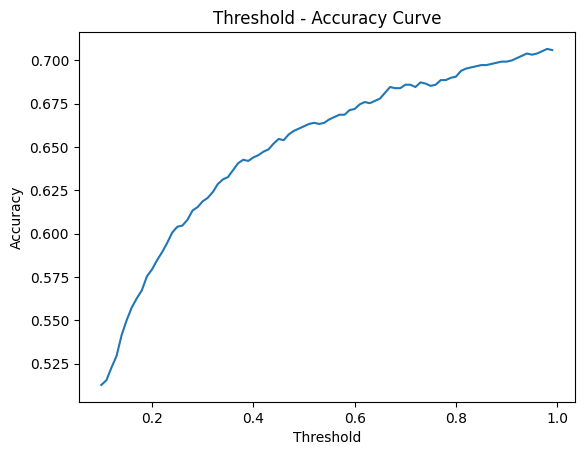

In [54]:
import lightgbm as lgb
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import accuracy_score, roc_auc_score
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import randint, uniform

# 假设数据已经加载并分为 x_train, x_test, y_train, y_test

# 定义基础模型
lgb_model = lgb.LGBMClassifier(random_state=42)

# 定义参数分布（包含连续型和离散型参数）
param_dist = {
    'num_leaves': randint(20, 128),            # 随机选择20-127之间的整数
    'learning_rate': uniform(0.01, 0.3),       # 均匀分布在0.01-0.31之间
    'n_estimators': randint(100, 500),         # 随机选择100-499之间的整数
    'max_depth': [-1, 5, 10, 15, 20],          # 从预定义值中随机选择
    'subsample': uniform(0.6, 0.4),            # 均匀分布在0.6-1.0之间
    'colsample_bytree': uniform(0.6, 0.4)      # 均匀分布在0.6-1.0之间
}

# 初始化随机搜索
random_search = RandomizedSearchCV(
    estimator=lgb_model,
    param_distributions=param_dist,
    n_iter=50,                 # 随机采样组合数量（原网格搜索有324种组合）
    cv=5,
    scoring='roc_auc',
    n_jobs=-1,
    random_state=42
)

# 执行搜索
random_search.fit(x_train, y_train)

print("最佳参数组合:", random_search.best_params_)
best_lgb = random_search.best_estimator_

# 在测试集上评估
y_pred_proba = best_lgb.predict_proba(x_test)[:, 1]
print("测试集 AUC: ", roc_auc_score(y_test, y_pred_proba))

# 阈值优化分析
accuracies = []
thresholds = np.arange(0.1, 1, 0.01)

for threshold in thresholds:
    y_pred = (y_pred_proba >= threshold).astype(int)
    accuracies.append(accuracy_score(y_test, y_pred))

max_accuracy_index = np.argmax(accuracies)
optimal_threshold = thresholds[max_accuracy_index]
max_accuracy = accuracies[max_accuracy_index]

print(f"最佳阈值: {optimal_threshold}")
print(f"最大准确率: {max_accuracy}")

# 绘制曲线
plt.plot(thresholds, accuracies)
plt.xlabel('Threshold')
plt.ylabel('Accuracy')
plt.title('Threshold - Accuracy Curve')
plt.show()


结果可视化

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 1338, number of negative: 3462
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000522 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2115
[LightGBM] [Info] Number of data points in the train set: 4800, number of used features: 27
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.278750 -> initscore=-0.950670
[LightGBM] [Info] Start training from score -0.950670
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive g

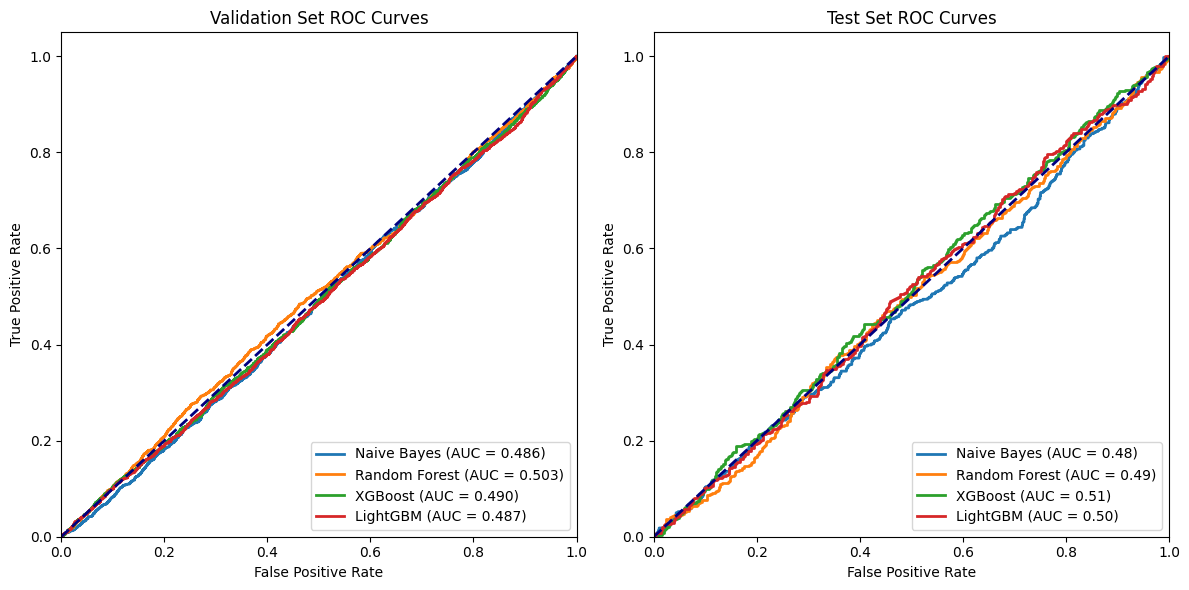

In [55]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import cross_val_predict

from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
import lightgbm as lgb

models = {##定义模型及其最佳参数
    "Naive Bayes": GaussianNB(var_smoothing=1e-5),
    "Random Forest": RandomForestClassifier(
        max_depth=10, max_features='sqrt', min_samples_leaf=1,
        min_samples_split=10, n_estimators=200
    ),
    "XGBoost": xgb.XGBClassifier(
        colsample_bytree=0.8, learning_rate=0.1, max_depth=3,
        n_estimators=100, subsample=0.8
    ),
    "LightGBM": lgb.LGBMClassifier(
        colsample_bytree=0.8, learning_rate=0.1, max_depth=5,
        n_estimators=100, num_leaves=31, subsample=0.8
    )
}

# 绘制验证集的 ROC 曲线
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)  # 左边图：验证集

for name, model in models.items():
    # 使用交叉验证获取验证集的预测概率
    y_pred_val = cross_val_predict(model, x_train, y_train, cv=5, method='predict_proba')[:, 1]
    fpr, tpr, _ = roc_curve(y_train, y_pred_val)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, lw=2, label=f'{name} (AUC = {roc_auc:.3f})')

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Validation Set ROC Curves')
plt.legend(loc="lower right")

##绘制测试集的ROC曲线
plt.subplot(1, 2, 2)##右边图为测试集

for name, model in models.items():##训练模型并在测试集上进行预测
    model.fit(x_train, y_train)
    y_pred_test = model.predict_proba(x_test)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, y_pred_test)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, lw=2, label=f'{name} (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Test Set ROC Curves')
plt.legend(loc="lower right")

plt.tight_layout()
plt.show()

结果分析

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 1672, number of negative: 4328
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000770 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2127
[LightGBM] [Info] Number of data points in the train set: 6000, number of used features: 27
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.278667 -> initscore=-0.951085
[LightGBM] [Info] Start training from score -0.951085
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive g

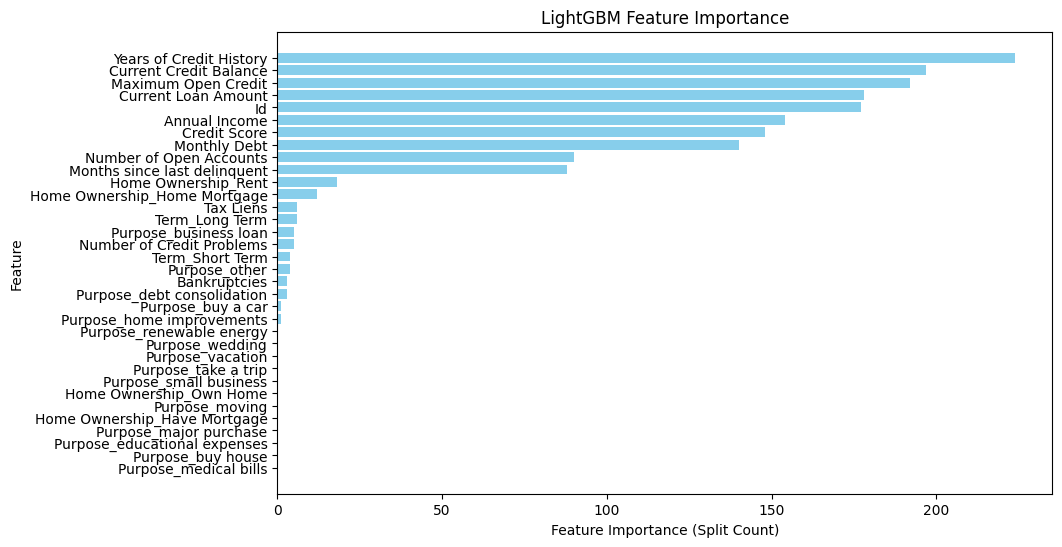

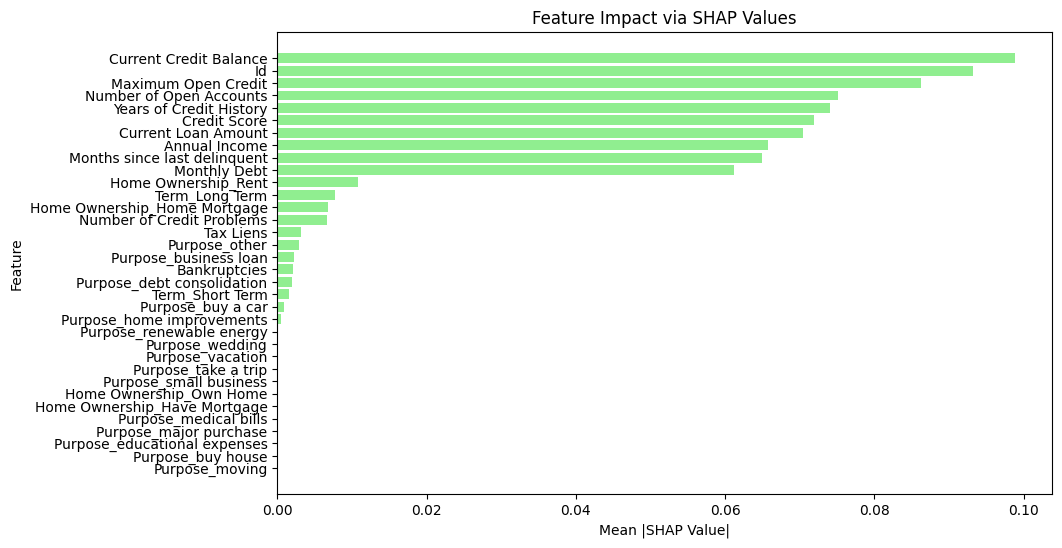


最佳阈值: 0.6699999999999997
最大准确率: 0.7066666666666667


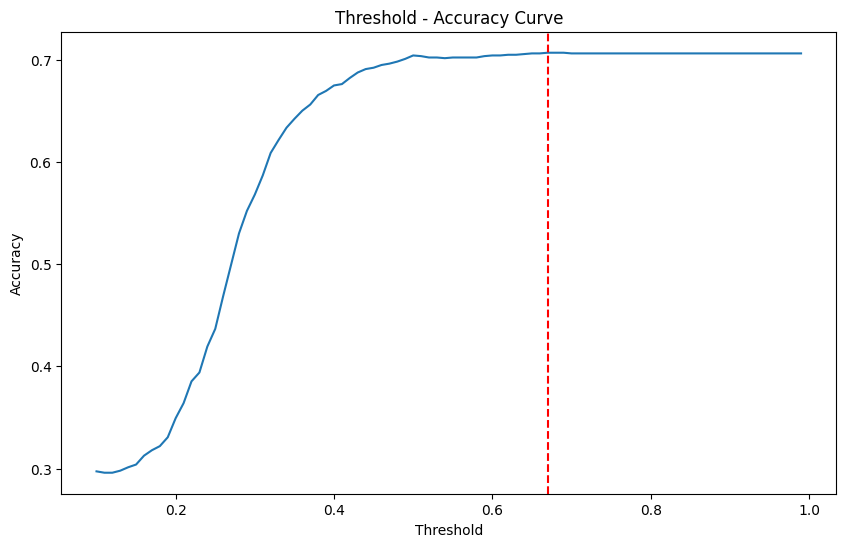


最终模型评估:
测试集 AUC: 0.5015


In [56]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import lightgbm as lgb
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import roc_auc_score, accuracy_score
import shap

# ---------- 数据预处理 ----------
# 假设x和y已经定义
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# 修复索引并移除零方差特征
x_train = x_train.loc[:, x_train.var() > 0].reset_index(drop=True)
y_train = y_train.reset_index(drop=True)

# ---------- 模型训练和调参 ----------
# 最佳参数模型（假设已经通过GridSearchCV找到）
best_params = {
    'colsample_bytree': 0.8,
    'learning_rate': 0.1,
    'max_depth': 5,
    'n_estimators': 100,
    'num_leaves': 31,
    'subsample': 0.8,
    'random_state': 42
}

lgb_model = lgb.LGBMClassifier(**best_params)
lgb_model.fit(x_train, y_train)

# ---------- 特征重要性分析 ----------
# 获取特征重要性（按分裂次数）
feature_importance = lgb_model.feature_importances_
features = x_train.columns

# 创建特征重要性DataFrame
importance_df = pd.DataFrame({
    'Feature': features,
    'Importance': feature_importance
}).sort_values('Importance', ascending=False)

print("\n特征重要性分析:")
print(importance_df)

# ---------- SHAP值分析 ----------
# 计算SHAP值（需要安装shap库：pip install shap）
explainer = shap.TreeExplainer(lgb_model)
shap_values = explainer.shap_values(x_train)

# 获取平均|SHAP|值作为特征重要性度量
shap_importance = np.abs(shap_values[1]).mean(axis=0)
shap_df = pd.DataFrame({
    'Feature': features,
    'SHAP_Importance': shap_importance
}).sort_values('SHAP_Importance', ascending=False)

print("\nSHAP特征重要性分析:")
print(shap_df)

# ---------- 可视化部分 ----------
plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'], importance_df['Importance'], color='skyblue')
plt.xlabel('Feature Importance (Split Count)')
plt.ylabel('Feature')
plt.title('LightGBM Feature Importance')
plt.gca().invert_yaxis()
plt.show()

plt.figure(figsize=(10, 6))
plt.barh(shap_df['Feature'], shap_df['SHAP_Importance'], color='lightgreen')
plt.xlabel('Mean |SHAP Value|')
plt.ylabel('Feature')
plt.title('Feature Impact via SHAP Values')
plt.gca().invert_yaxis()
plt.show()

# ---------- 阈值优化 ----------
y_pred_proba = lgb_model.predict_proba(x_test)[:, 1]
accuracies = []
thresholds = np.arange(0.1, 1, 0.01)

for threshold in thresholds:
    y_pred = (y_pred_proba >= threshold).astype(int)
    accuracy = accuracy_score(y_test, y_pred)
    accuracies.append(accuracy)

max_accuracy_index = np.argmax(accuracies)
optimal_threshold = thresholds[max_accuracy_index]
max_accuracy = accuracies[max_accuracy_index]

print(f"\n最佳阈值: {optimal_threshold}")
print(f"最大准确率: {max_accuracy}")

plt.figure(figsize=(10, 6))
plt.plot(thresholds, accuracies)
plt.axvline(x=optimal_threshold, color='r', linestyle='--')
plt.xlabel('Threshold')
plt.ylabel('Accuracy')
plt.title('Threshold - Accuracy Curve')
plt.show()

# ---------- 最终模型评估 ----------
print("\n最终模型评估:")
print(f"测试集 AUC: {roc_auc_score(y_test, y_pred_proba):.4f}")


机器学习可解释性分析

原则上挑选表现最好的模型
这里选择用LightGBM，因为他虽然不是表现最好的，但是是计算速度最快的

In [57]:
##shap解释需要计算shap值，才可以后续可视化
import shap
import lightgbm as lgb

##使用最佳参数重新训练一个新的 LightGBM 模型
best_params = {'learning_rate': 0.1, 'n_estimators': 200, 'num_leaves': 63}
lgb_best = lgb.LGBMClassifier(**best_params)
lgb_best.fit(x_train, y_train)

##使用shap进行解释
##创建一个SHAP解释器，使用训练好的LightGBM模型
explainer = shap.Explainer(lgb_best)

shap_values = explainer.shap_values(x_train)##计算 SHAP 值，使用训练集

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 1672, number of negative: 4328
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000625 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2127
[LightGBM] [Info] Number of data points in the train set: 6000, number of used features: 27
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.278667 -> initscore=-0.951085
[LightGBM] [Info] Start training from score -0.951085


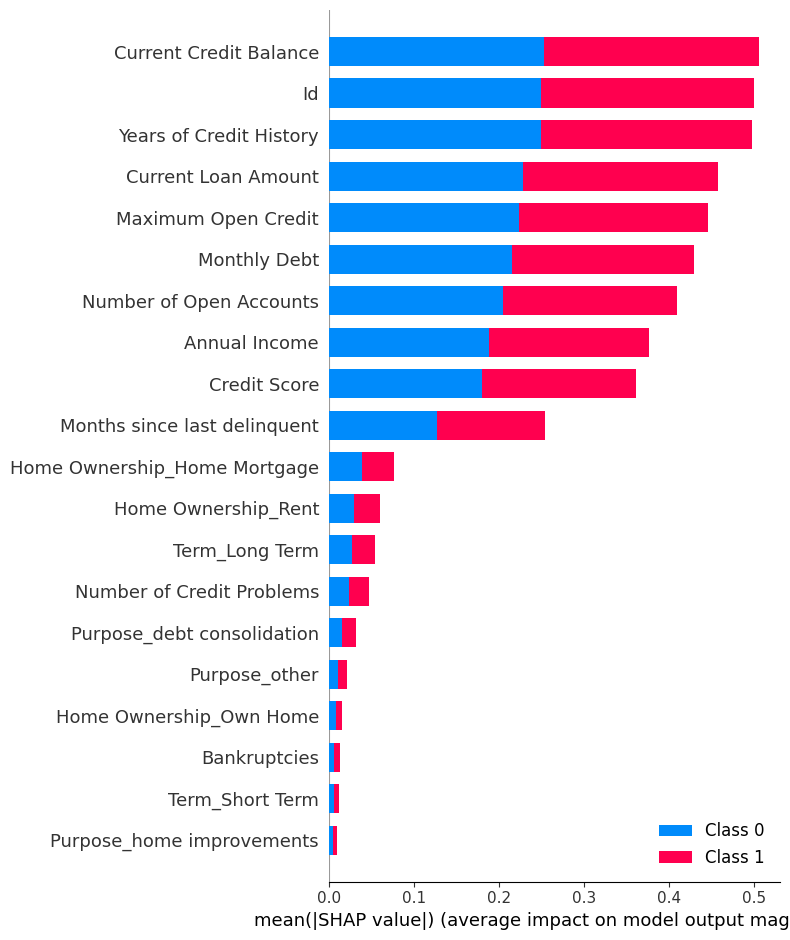

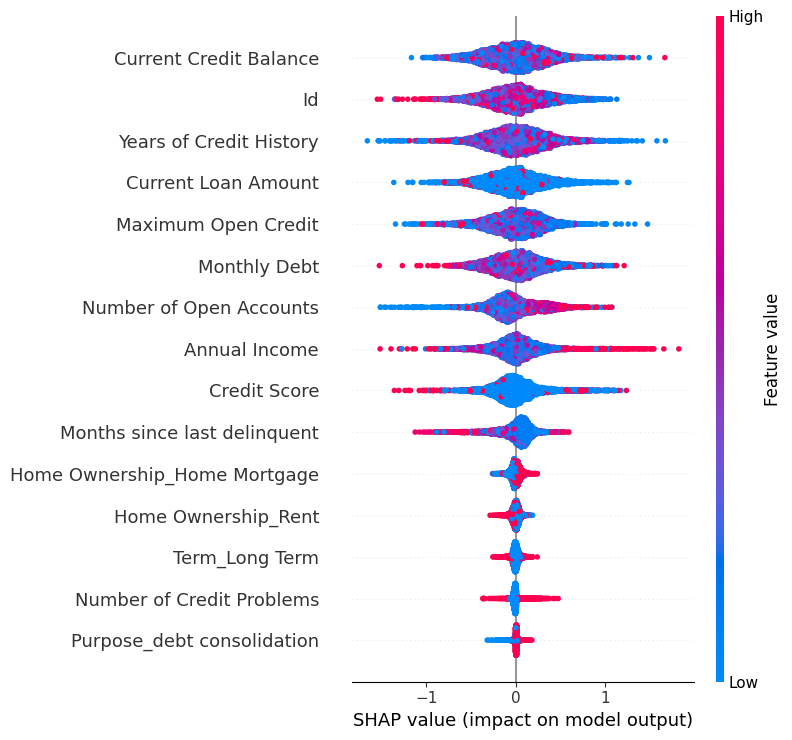

<class 'pandas.core.frame.DataFrame'>
Index: 1500 entries, 970 to 2669
Data columns (total 34 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Id                            1500 non-null   float64
 1   Annual Income                 1500 non-null   float64
 2   Tax Liens                     1500 non-null   float64
 3   Number of Open Accounts       1500 non-null   float64
 4   Years of Credit History       1500 non-null   float64
 5   Maximum Open Credit           1500 non-null   float64
 6   Number of Credit Problems     1500 non-null   float64
 7   Months since last delinquent  1500 non-null   float64
 8   Bankruptcies                  1500 non-null   float64
 9   Current Loan Amount           1500 non-null   float64
 10  Current Credit Balance        1500 non-null   float64
 11  Monthly Debt                  1500 non-null   float64
 12  Credit Score                  1500 non-null   float64
 13  Home O

In [58]:
shap.summary_plot(shap_values, x_train)##可视化所有类别的SHAP汇总图
shap.summary_plot(shap_values[0], x_train,plot_type="dot", max_display=15)##SHAP汇总图默认设置为点图，可以反应特征的重要性和影响方向
x_test.info()

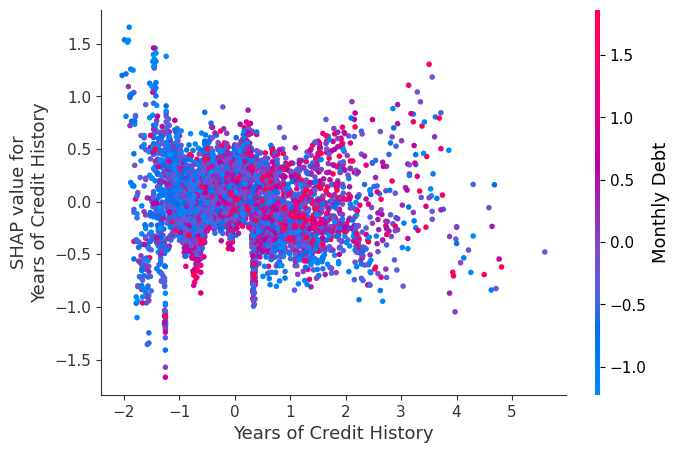

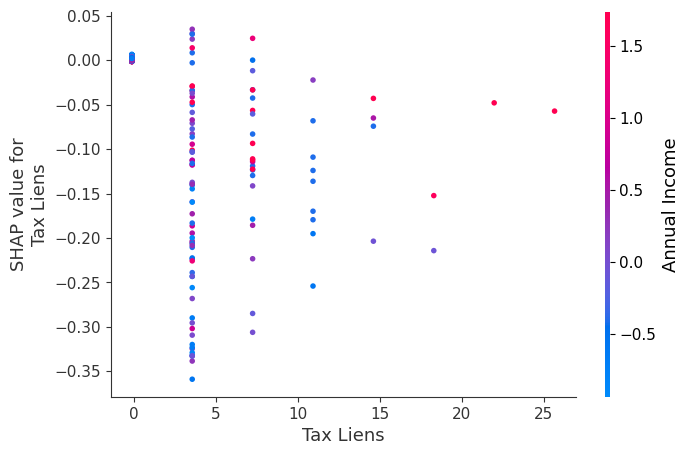

In [59]:
##要通过优化数据的分布来优化可视化的图形
shap.dependence_plot('Years of Credit History', shap_values[1], x_train, interaction_index="Monthly Debt")
shap.dependence_plot('Tax Liens', shap_values[1], x_train, interaction_index="Annual Income")

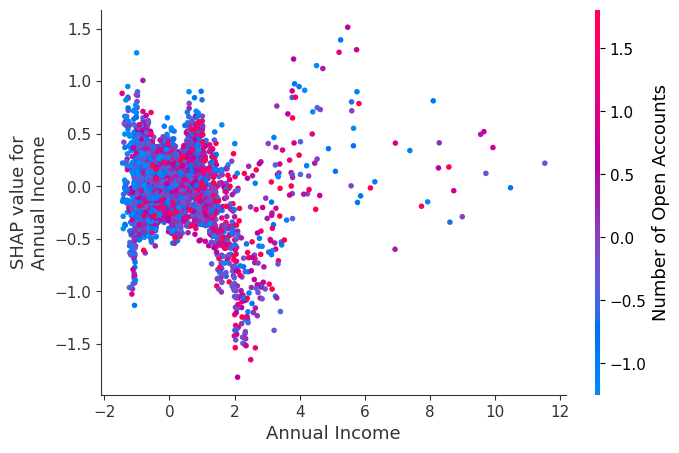

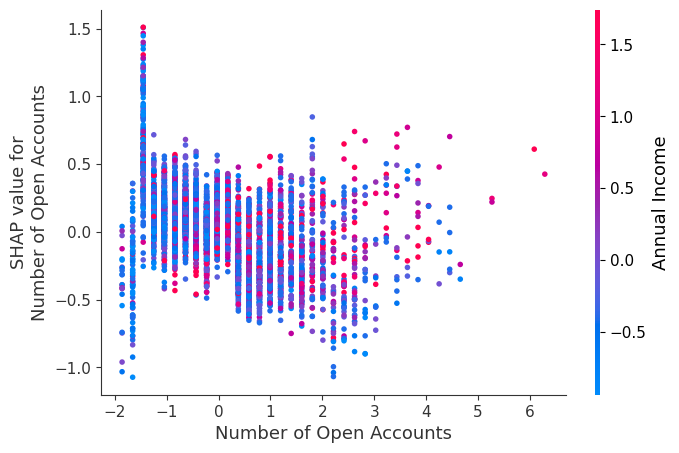

In [60]:
shap.dependence_plot('Annual Income', shap_values[1], x_train, interaction_index="Number of Open Accounts")
shap.dependence_plot('Number of Open Accounts', shap_values[1], x_train, interaction_index="Annual Income")

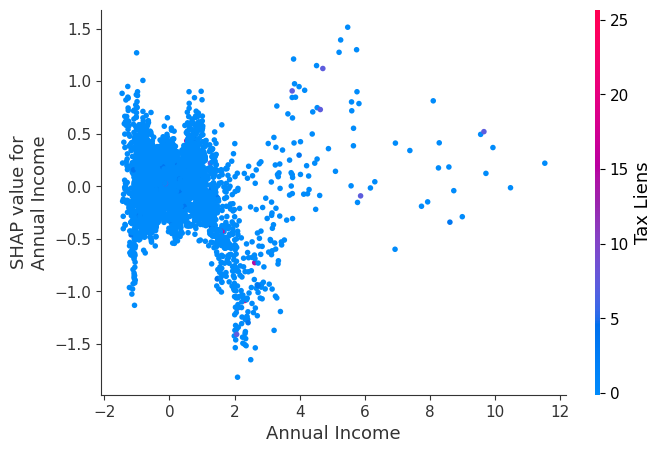

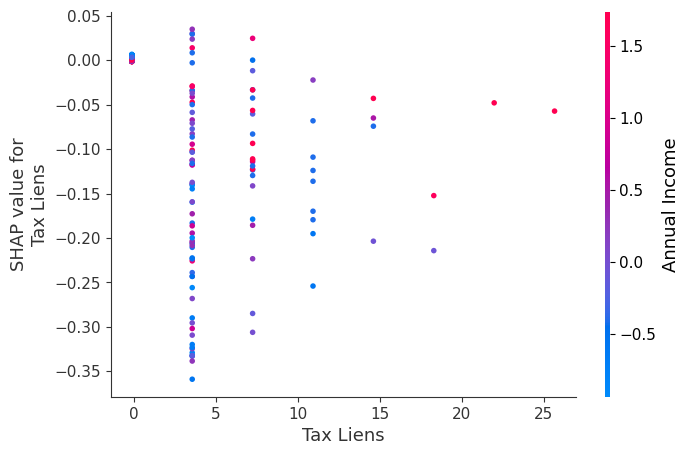

In [61]:
shap.dependence_plot('Annual Income', shap_values[1], x_train, interaction_index="Tax Liens")
shap.dependence_plot('Tax Liens', shap_values[1], x_train, interaction_index="Annual Income")

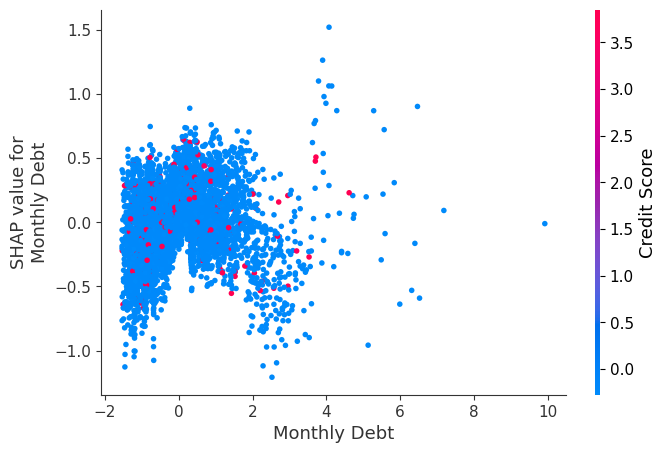

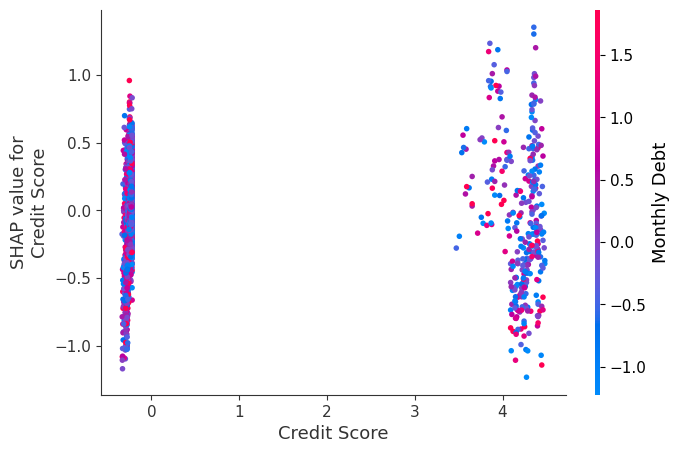

In [62]:
shap.dependence_plot('Monthly Debt', shap_values[1], x_train, interaction_index="Credit Score")
shap.dependence_plot('Credit Score', shap_values[1], x_train, interaction_index="Monthly Debt")

In [63]:
# 绘制交互效应热力图，这个要运行很久
shap_interaction_values = explainer.shap_interaction_values(x_train)

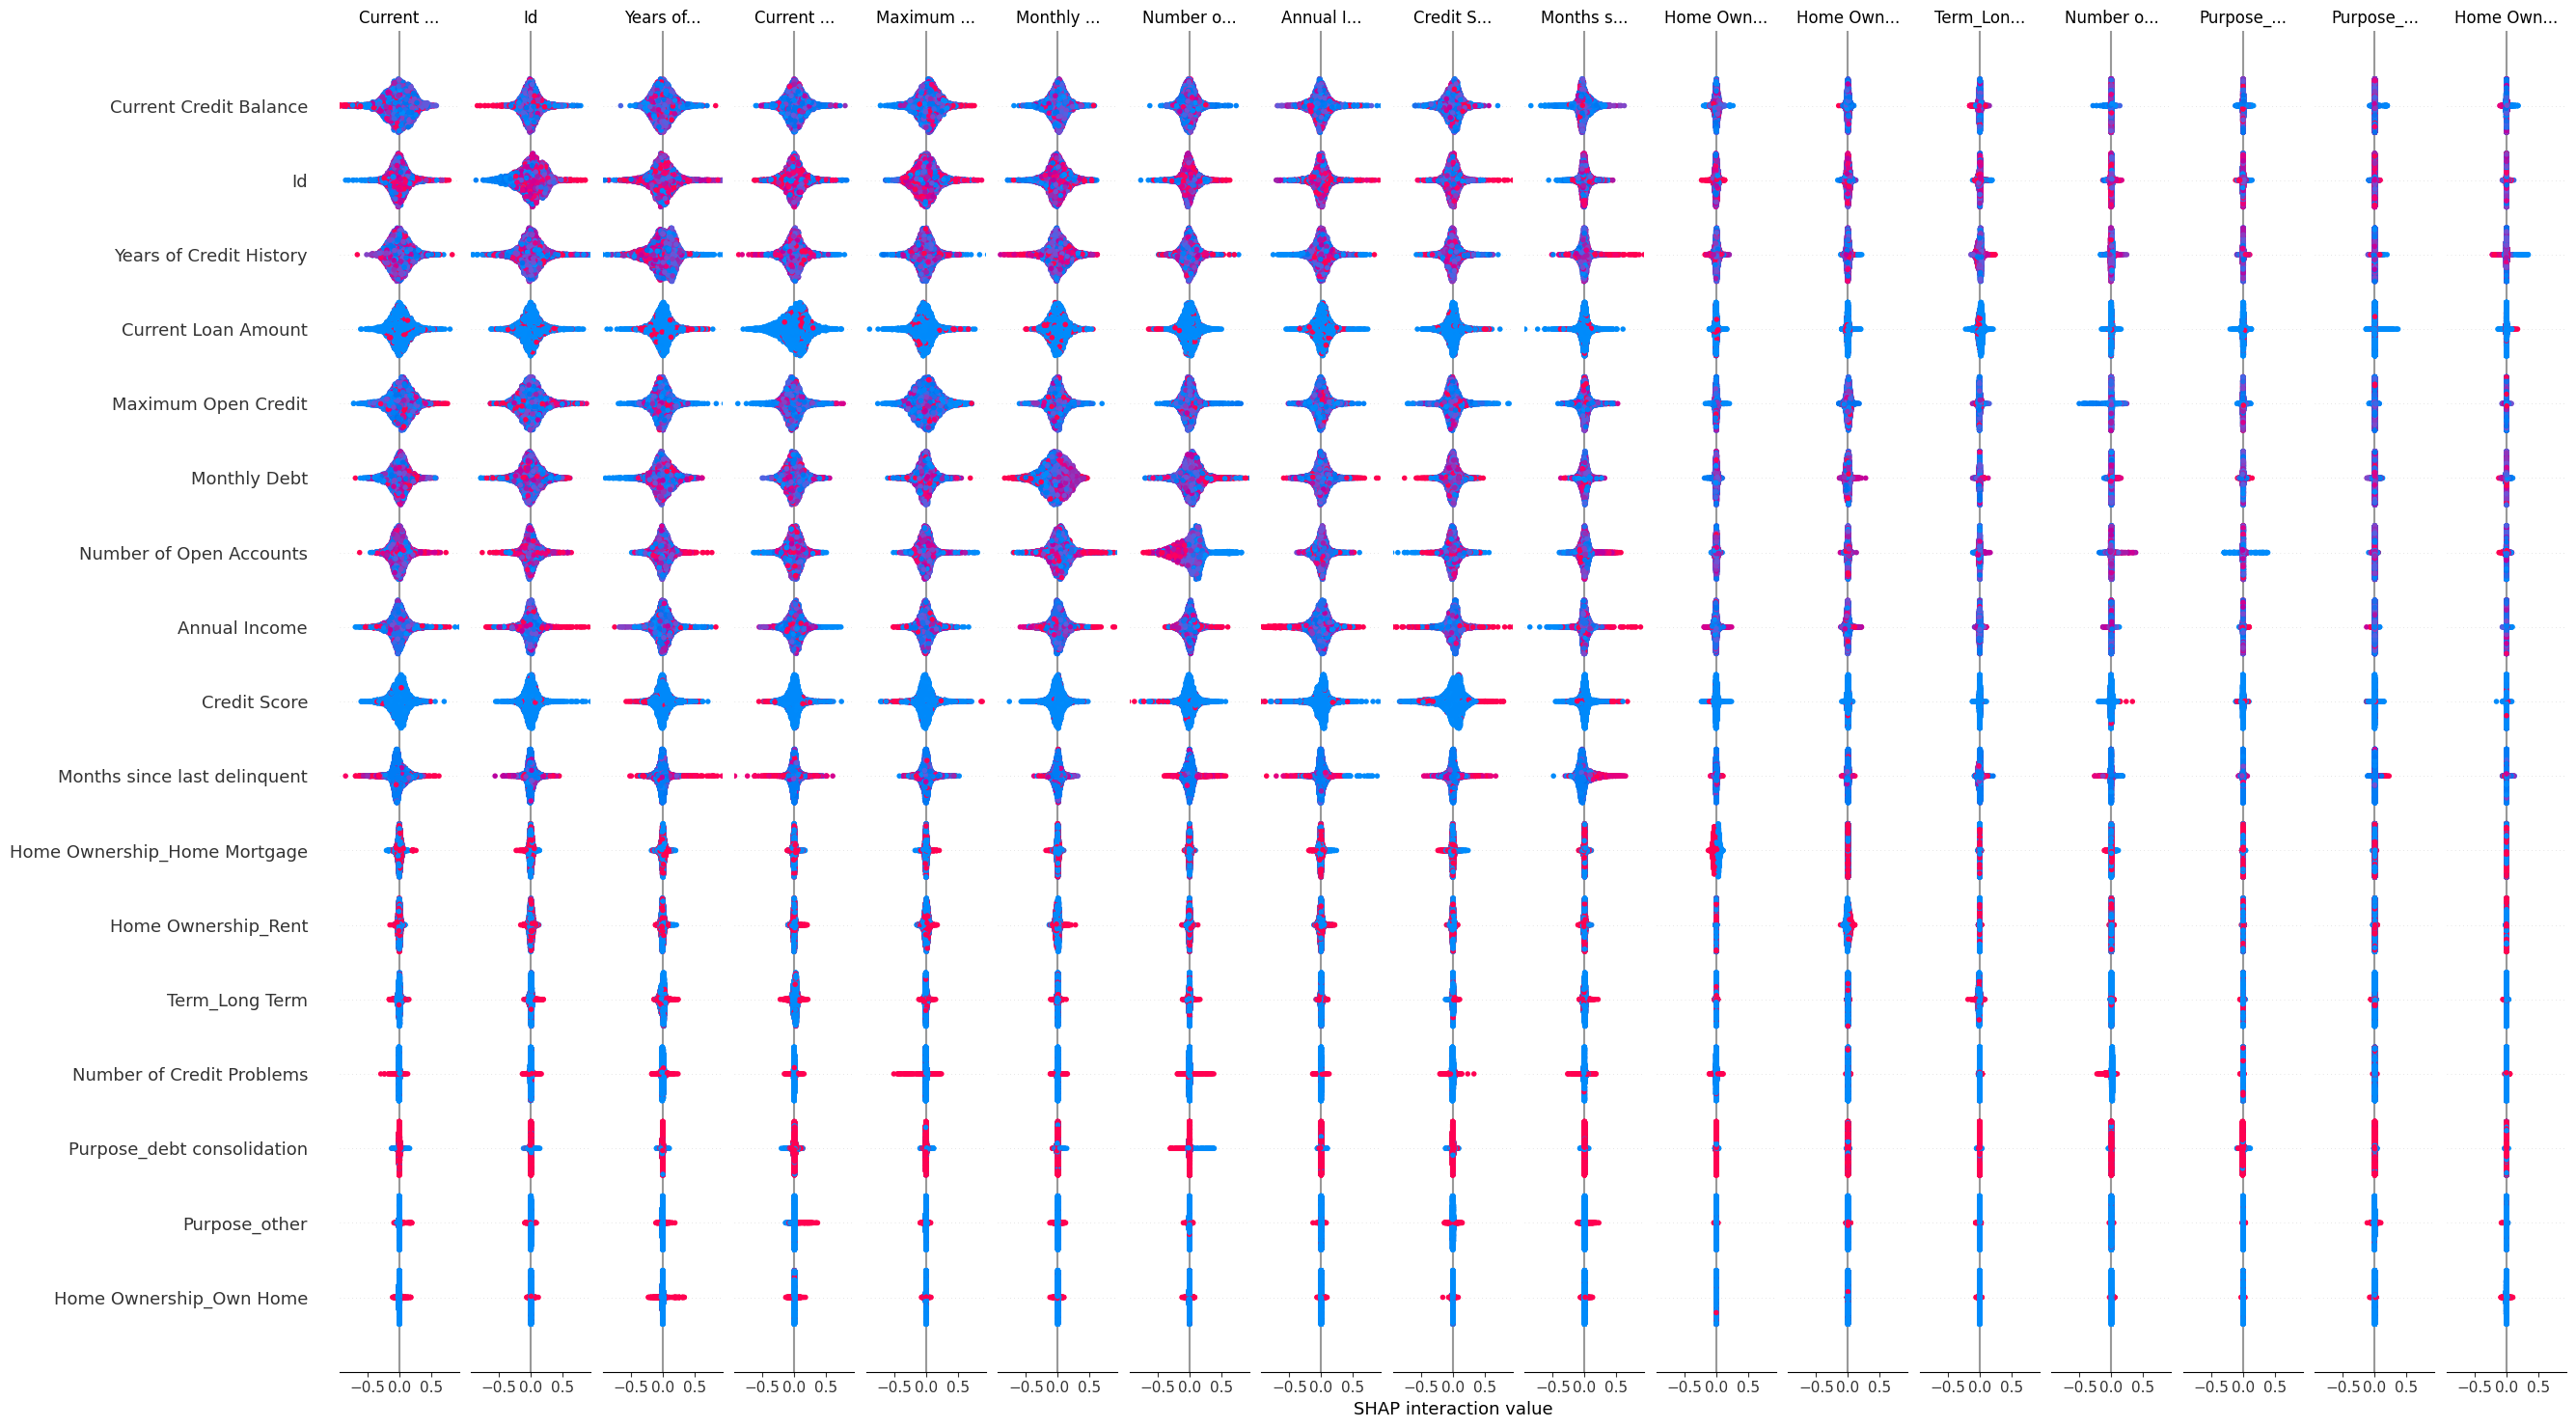

In [64]:
# shap的交互是比较复杂的协同关系，并不是简单的相乘
# 可视化交互效应，max_display这个参数可以控制显示的特征数量，这个特征的顺序是重要度顺序
shap.summary_plot(shap_interaction_values, x_train, max_display=17)
# 如果分布在0附近，说明这个特征交互对模型的影响不大
# 如果分布在两端，说明这个特征交互对模型的影响很大